# Homework 6 Logistic Regression

## Derek Anderson, Justin Dygert, Cameron Miller

### Question 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set() 
rand_state= 1000

df = pd.read_csv('credit_card_clean.csv')
df_raw = df
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


1. Change the type of the feature variables as you see fit! numerical variables vs categorical ones. You can use my answer key from HW3 as your reference. 

The features types have been changed. We used the homework 3 key to change them back to numerical and categorical. Here is the result:

In [4]:
categoricals = ['SEX', 'AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'PAY_6']
numerics = ['ID','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
            'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in categoricals:
    df[col] = df[col].astype("category")
    
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  category
 3   EDUCATION  30000 non-null  category
 4   MARRIAGE   30000 non-null  category
 5   AGE        30000 non-null  category
 6   PAY_1      30000 non-null  category
 7   PAY_2      30000 non-null  category
 8   PAY_3      30000 non-null  category
 9   PAY_4      30000 non-null  category
 10  PAY_5      30000 non-null  category
 11  PAY_6      30000 non-null  category
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

2. Define your target variable. What are the proportions of  vs non- in your data set? Is the target variable balanced or relatively imbalanced? 

In [5]:
pd.crosstab(df['DEFAULT'],df['DEFAULT'], normalize='all')*100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


About 78% of the observations did not default, the ramining 22% did. Based on this, the target variable is fairly imbalanced. There is quite a lot more non default than default.

3. Use get_dummies( drop_first=True ) function from pandas package to make the categorical variables into dummy variables. How many features you have now?  

In [6]:
feature = pd.get_dummies(df, drop_first = True)
feature.head()

,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


There are now 134 features. Excluding the ID variable, we get 133.

4. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [7]:
y = feature['DEFAULT']
X = feature.drop('DEFAULT', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)
X_train.head()


,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
25941,25942,210000.0,25650.0,1360.0,31793.0,32943.0,30019.0,30657.0,1360.0,31793.0,...,0,0,1,0,0,0,0,0,0,0
44,45,40000.0,18927.0,21295.0,25921.0,25209.0,26636.0,29197.0,3000.0,5000.0,...,0,0,1,0,0,0,0,0,0,0
16295,16296,120000.0,116983.0,117616.0,74853.0,78692.0,78456.0,76140.0,5750.0,4000.0,...,0,0,0,1,0,0,0,0,0,0
20232,20233,280000.0,390.0,11223.0,15225.0,4951.0,2408.0,8360.0,11223.0,15262.0,...,0,1,0,0,0,0,0,0,0,0
888,889,90000.0,24401.0,22771.0,19461.0,16181.0,14669.0,14422.0,1454.0,1384.0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
np.round(len(X_train)/len(X),3)

0.7

This just confirms the split was 30% and 70%

5. From sklearn.linear_model import the relevant functions for Logistic Regression. Do the followings: 

In [9]:
from sklearn.linear_model import LogisticRegression

5.1 Train the logistic regression model using its  parameters. 

In [10]:
logistic = LogisticRegression(penalty='none')
logistic.fit(X_train, y_train)

LogisticRegression(penalty='none')

5.2 Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.

In [11]:
y_hat      = logistic.predict(X_test)
y_hat_probs = logistic.predict_proba(X_test)[:,1] 

np.round(logistic.predict_proba(X_test),3)

np.max(y_hat_probs)

0.6584802116151565

5.3 Plot the histogram of y_hat_probs? Explain what you see? if you set threshold=0.80, what does the model always predict? What is the implication for recall? 

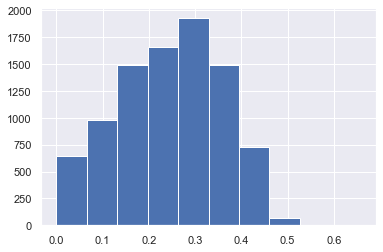

In [12]:
plt.hist(y_hat_probs)
plt.show()

In [13]:
y_hat_80 = np.where(y_hat_probs>0.80,1,0)

The distribution looks kind of normal, which is interesting. If the threshold is .8, then the model is only marking observations as default if the probability is above .8. Because all the values here are below .8, it would say that every observation is not default which would generate too many false negatives. This would decrease the recall. Recall is true positive or true positive plus false negative. The denominator is increasing with the numerator staying the same, which always makes the fraction smaller giving a smaller decimal, thus decreasing the recall.

5.4 Generate predicted classifications for two different thresholds (30% and 60% threshold). Save these new predictions as y_hat_30 and y_hat_60. Which threshold should you use if your goal is to avoid too many false negatives? Explain your answer.

In [14]:
y_hat_30 = np.where(y_hat_probs>0.30,1,0)
y_hat_60 = np.where(y_hat_probs>0.60,1,0)

We would use the 30% threshold. As the threshold increases, the number of false positives also increases. In a sense, its "harder" for observations to be marked as default if the threshold is too high. We saw this issue in the previous problem.

5.5 Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous part.

In [15]:
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_80':y_hat_80, 'y_hat_60':y_hat_60,'y_hat_30':y_hat_30})
df_predictions.tail()

,y_test,y_hat_probs,y_hat_80,y_hat_60,y_hat_30
14308,0,0.002086,0,0,0
20266,1,0.335714,0,0,1
15837,0,0.164611,0,0,0
3323,0,0.391472,0,0,1
18825,1,0.188606,0,0,0


6. Borrow my_logistic_report() function from the python notebook of class 11. 

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5, penalty='none', class_weight=None): # you could make it even more general!
    logistic= LogisticRegression(class_weight=class_weight, penalty=penalty)
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled

6.1 Report the Accuracy, precision, recall and f1 score along with the confusion matrix for threshold =0.5. Interpret all these statistics. Do you trust the accuracy of the model? why? 

In [17]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.78
Precision = 0.0
Recall    = 0.0
f1_score  = 0.0
MCC       = -0.01
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,7008,3
Actual : positive,1989,0


The accuracy is .78, that just how good out model is at predicting. Precision is how many positives our model predicted out of the total true positives. As can be seen, our model did not predict any positives that were actaully positive, that's why precision is 0. Recall is 0 because no true positive were predicted. F1_score is 0 because it involves recall and precision and both are 0. No, the threshold is too high, and we are getting too many false negatives, for how imbalanced the data is.

6.2 Now use threshold = 0.3 in the my_logistic_report() function. what happens to accuracy, precision, recall and f1 score? what happens to false negatives? is this consistent with you answer to question 5.4?

In [18]:
my_logistic_report(X_train, y_train, X_test,y_test, threshold=0.3)

-----------------------------------------
Accuracy  = 0.66
Precision = 0.32
Recall    = 0.5
f1_score  = 0.39
MCC       = 0.18
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4897,2114
Actual : positive,985,1004


Our accuracy decreses, and the three other indicators increase. The false negatives decrease which is what was casuing the problems in the previous problem. Our model is now able to correctly predict true positives giving us an actual number for precision, recall and f1_score. This is consistent with what we said in 5.4, the lower the threshold, the fewer false negatives.

7. Plot the ROC curve and report the AUC score. Is your model doing a better job than random prediction (no skill)? 

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.652


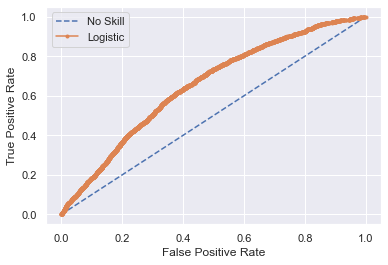

In [20]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = logistic.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Our logistic curve is about the no skill line, and our AUC is .652 which is greater than .5 so our model is better than just guessing.

8. Estimate the accuracy_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as accuracy_CV5 and accuracy_CV10. Are these numbers close to accuracy score from part 6.1? report your numbers with 5 digits precision. Why do you think all these 3 numbers are very close to each other?

In [21]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [22]:
acc1 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

acc2 = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10 , scoring="accuracy" )

In [23]:
accuracy_CV5 = round(acc1.mean(),5)
accuracy_CV5

0.77876

In [24]:
accuracy_CV10 = round(acc2.mean(),5)
accuracy_CV10

0.77876

All three accuracies are close to each other. The data is so imbalanced that any high threshold is going to give us more false negatives and shake our confidence in our accuracy. Also, the fact that these values are all similar, suggests that our original model, used on just the training set, is not overfitting the data.